In [1]:
from utils import *

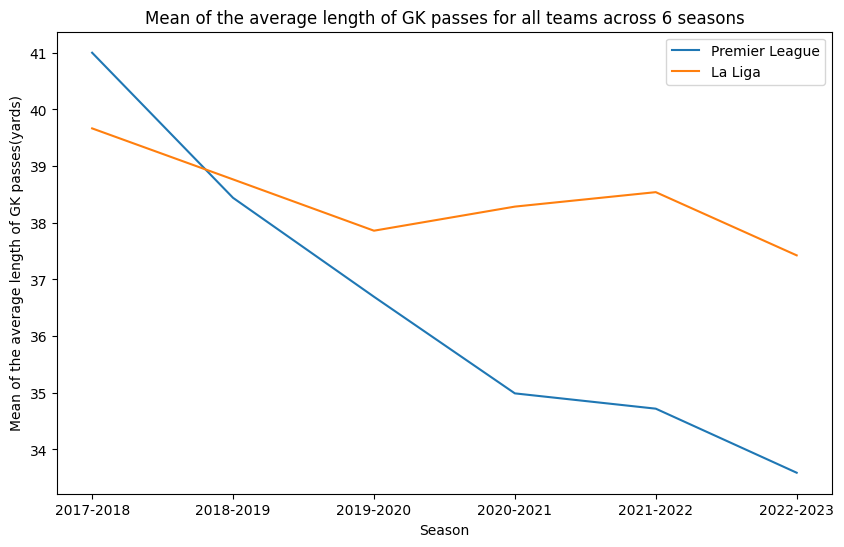

           League  Tau   P-Value  \
0  Premier League -1.0  0.002778   
1         La Liga -0.6  0.136111   

                                              Trend  
0      Decreasing trend (p = 0.0028, tau = -1.0000)  
1  No significant trend (p = 0.1361, tau = -0.6000)  


<Figure size 640x480 with 0 Axes>

In [2]:
calc_and_plot_adv_trends(
    feature = 'gk_passes_length_avg',
    seasons=['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
)

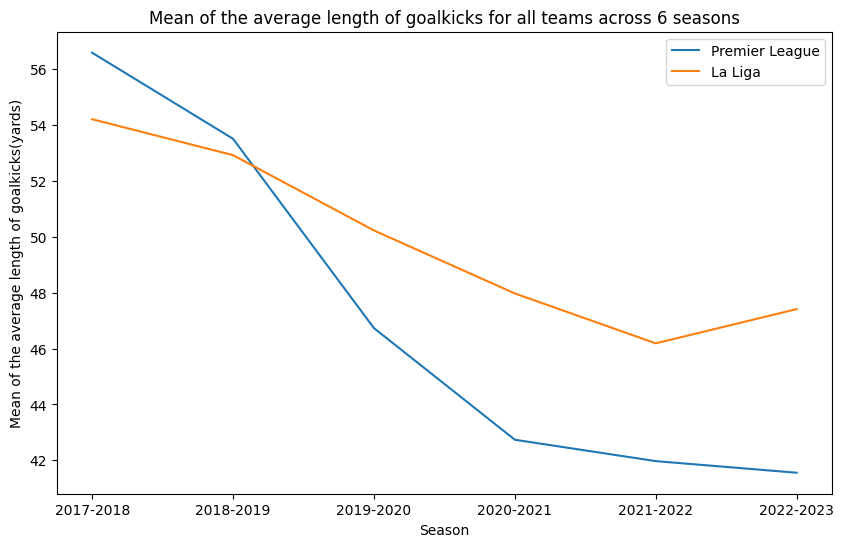

           League       Tau   P-Value  \
0  Premier League -1.000000  0.002778   
1         La Liga -0.866667  0.016667   

                                          Trend  
0  Decreasing trend (p = 0.0028, tau = -1.0000)  
1  Decreasing trend (p = 0.0167, tau = -0.8667)  


<Figure size 640x480 with 0 Axes>

In [3]:
calc_and_plot_adv_trends(
    feature = 'gk_goal_kick_length_avg',
    seasons=['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
)

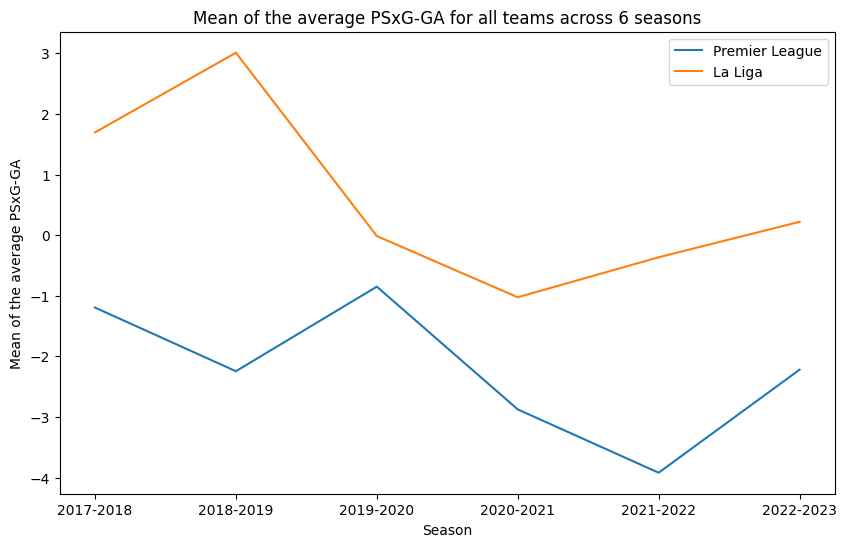

           League       Tau   P-Value  \
0  Premier League -0.333333  0.469444   
1         La Liga -0.333333  0.469444   

                                              Trend  
0  No significant trend (p = 0.4694, tau = -0.3333)  
1  No significant trend (p = 0.4694, tau = -0.3333)  


<Figure size 640x480 with 0 Axes>

In [4]:
calc_and_plot_adv_trends(
    feature = 'gk_psxg_net',
    seasons=['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
)

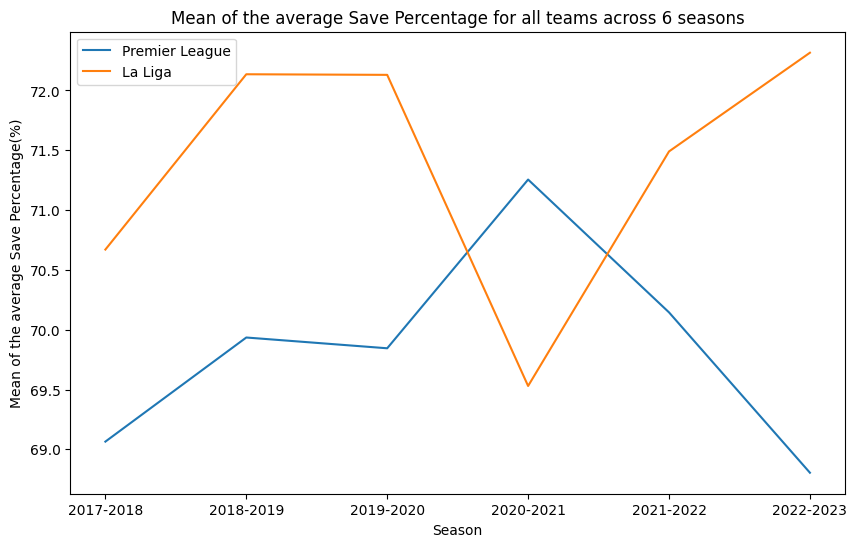

           League       Tau   P-Value  \
0  Premier League  0.066667  1.000000   
1         La Liga  0.200000  0.719444   

                                             Trend  
0  No significant trend (p = 1.0000, tau = 0.0667)  
1  No significant trend (p = 0.7194, tau = 0.2000)  


<Figure size 640x480 with 0 Axes>

In [5]:
calc_and_plot_trad_trends(
    feature = 'gk_save_pct',
    seasons=['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
)

Short mean = 86.74874999999999, short std = 3.3683079487333094
Long mean = 53.48708333333333, long std = 6.8706228363753326


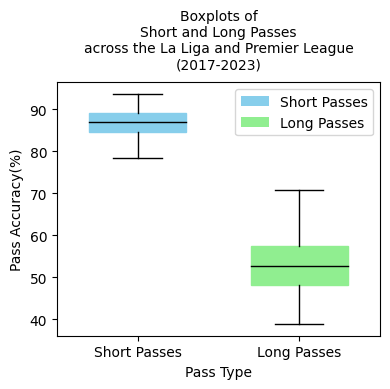

<Figure size 640x480 with 0 Axes>

In [2]:
plot_passing_boxplots()

In [15]:
season = '2024-2025'
season_start, season_with_end = encode_season(season_str = season)
league = 'Premier League'
encoded_league = league_url_idx[league]
prefix = f'https://fbref.com/en/comps/{encoded_league}/{season_start}/'
suffix = f'/{season_with_end}{league.replace(" ", "-")}-Stats'
#df = get_keeper_data(top = prefix, end = suffix)
#df.head()
res = requests.get(prefix + 'keepers' + suffix)
comment_pattern = re.compile(r"<!--.*?-->", re.DOTALL)
html_no_comments = comment_pattern.sub("", res.text)
soup = BeautifulSoup(html_no_comments, "lxml")
all_tbody_tags = soup.find_all("tbody")
#features = ["player","nationality","position","team","age","birth_year","gk_games","gk_games_starts","gk_minutes","gk_save_pct"]
#df = get_frame(features = features, player_table = all_tables[1])
#df.head()
print(len(all_tbody_tags))
all_tbody_tags[1]


2


<tbody> <tr><th class="left" data-stat="team" scope="row"><a href="/en/squads/18bb7c10/Arsenal-Stats">vs Arsenal</a></th><td class="right" data-stat="players_used">1</td><td class="right modified group_start" data-stat="gk_games">17</td><td class="right modified" data-stat="gk_games_starts">17</td><td class="right modified" csk="1530" data-stat="gk_minutes">1,530</td><td class="right modified" data-stat="minutes_90s">17.0</td><td class="right modified group_start" data-stat="gk_goals_against">34</td><td class="right modified" data-stat="gk_goals_against_per90">2.00</td><td class="right modified" data-stat="gk_shots_on_target_against">87</td><td class="right modified" data-stat="gk_saves">54</td><td class="right modified" data-stat="gk_save_pct">63.2</td><td class="right modified" data-stat="gk_wins">2</td><td class="right modified" data-stat="gk_ties">6</td><td class="right modified" data-stat="gk_losses">9</td><td class="right modified" data-stat="gk_clean_sheets">3</td><td class="rig

In [6]:
import requests
from bs4 import BeautifulSoup, Comment

def scrape_stats_keeper():
    url = "https://fbref.com/en/comps/9/keepers/Premier-League-Stats"
    res = requests.get(url)
    soup = BeautifulSoup(res.text, "lxml")

    # Grab all comment nodes
    comment_blocks = soup.find_all(string=lambda text: isinstance(text, Comment))

    stats_keeper_html = None
    for comment in comment_blocks:
        # Look for the chunk that has this table
        if "stats_keeper" in comment:
            stats_keeper_html = comment
            break

    if not stats_keeper_html:
        raise RuntimeError("Didn't find any commented-out HTML containing 'stats_keeper'.")

    # Now parse that comment block as HTML
    comment_soup = BeautifulSoup(stats_keeper_html, "lxml")

    # Then locate the <table id="stats_keeper"> inside this snippet
    stats_keeper_table = comment_soup.find("table", {"id": "stats_keeper"})
    if not stats_keeper_table:
        raise RuntimeError("Found the comment, but no <table id='stats_keeper'> inside it.")

    # Now get the <tbody> from that table
    tbody = stats_keeper_table.find("tbody")
    if not tbody:
        raise RuntimeError("No <tbody> found under <table id='stats_keeper'>!")

    
    rows = tbody.find_all("tr")

    #print(f"Found {len(rows)} rows in the #stats_keeper <tbody>.")
    return tbody

tbody = scrape_stats_keeper()
df = get_frame(
    features=[
        "player",
        "nationality",
        "position",
        "team",
        "age",
        "birth_year",
        "gk_games",
        "gk_games_starts",
        "gk_minutes",
        "minutes_90s",
        "gk_save_pct",
    ],
    player_table=tbody
)
df = (
    df[df["minutes_90s"] >= 10]                         
    .sort_values(by="gk_save_pct", ascending=False)    
    [["player", "team", "minutes_90s", "gk_save_pct"]]
    .reset_index(drop=True) 
)
df.head()

,player,team,minutes_90s,gk_save_pct
0,Robert Sánchez,Chelsea,17.0,78.2
1,Kepa Arrizabalaga,Bournemouth,13.0,75.8
2,David Raya,Arsenal,17.0,75.4
3,Matz Sels,Nott'ham Forest,18.0,74.3
4,Mark Flekken,Brentford,17.4,73.3


In [9]:
import requests
from bs4 import BeautifulSoup, Comment

def scrape_standard_stats(url):
    """
    Scrape the standard player stats table (table id='stats_standard') from
    a given FBref page. This table is usually hidden in an HTML comment block.
    Returns the <tbody> element or raises an error if not found.
    """

    # 1) Download the page
    res = requests.get(url)
    if res.status_code != 200:
        raise RuntimeError(f"Failed to retrieve page. Status code: {res.status_code}")

    # 2) Parse with BeautifulSoup
    soup = BeautifulSoup(res.text, "lxml")

    # 3) FBref often encloses certain tables inside HTML comment blocks.
    #    We search each comment block to find the snippet containing "stats_standard".
    comment_blocks = soup.find_all(string=lambda text: isinstance(text, Comment))

    stats_standard_html = None
    for comment in comment_blocks:
        if "stats_standard" in comment:
            stats_standard_html = comment
            break

    if not stats_standard_html:
        raise RuntimeError("Could not find HTML comment containing 'stats_standard'.")

    # 4) Parse the comment text as HTML
    comment_soup = BeautifulSoup(stats_standard_html, "lxml")

    # 5) Inside the comment, find the <table id="stats_standard"> 
    table = comment_soup.find("table", {"id": "stats_standard"})
    if not table:
        raise RuntimeError("Found the comment, but no <table id='stats_standard'> inside it.")

    # 6) Grab the <tbody> containing the player rows
    tbody = table.find("tbody")
    if not tbody:
        raise RuntimeError("No <tbody> found under <table id='stats_standard'>!")

    # Return the <tbody> so you can parse it further or build a DataFrame.
    return tbody

# Example usage:
# url_input = input("Enter FBref player-stats URL: ").strip()
# player_tbody = scrape_standard_stats(url_input)
#
# # Then parse 'player_tbody' with your existing `get_frame` or other scraping logic.
# df = get_frame(
#     features=["player", "position", "squad", ...],  # adjust as needed
#     player_table=player_tbody
# )
# print(df)
tbody = scrape_standard_stats(url = 'https://fbref.com/en/comps/9/2017-2018/stats/2017-2018-Premier-League-Stats')
len(tbody)

1100

In [10]:
tbody

<tbody><tr><th class="right" data-stat="ranker" scope="row">1</th><td class="left" csk="Aanholt Patrick" data-append-csv="5f09991f" data-stat="player"><a href="/en/players/5f09991f/Patrick-van-Aanholt">Patrick van Aanholt</a></td><td class="left poptip" data-stat="nationality" data-tip="NT"><a href="/en/country/NED/Netherlands-Football"><span style="white-space: nowrap"><span class="f-i f-nl" style="">nl</span> NED</span></a></td><td class="center" csk="2.0" data-stat="position">DF</td><td class="left" data-stat="team"><a href="/en/squads/47c64c55/2017-2018/Crystal-Palace-Stats">Crystal Palace</a></td><td class="center" data-stat="age">26</td><td class="center" data-stat="birth_year">1990</td><td class="right group_start" data-stat="games">28</td><td class="right" data-stat="games_starts">25</td><td class="right" csk="2184" data-stat="minutes">2,184</td><td class="right" data-stat="minutes_90s">24.3</td><td class="right group_start" data-stat="goals">5</td><td class="right" data-stat="

In [11]:
def find_harry_kane_progressive_passes(tbody):
    # 1) Loop over each <tr>
    for row in tbody.find_all("tr"):
        # 2) Find the 'player' cell
        player_cell = row.find("td", {"data-stat": "player"})
        if not player_cell:
            continue  # skip if there's no player cell in this row

        # 3) Check if the text matches "Harry Kane"
        player_name = player_cell.get_text(strip=True)
        if player_name.lower() == "harry kane":
            # 4) Find the 'progressive_passes' cell
            passes_cell = row.find("td", {"data-stat": "progressive_passes"})
            if passes_cell:
                return passes_cell.get_text(strip=True)

print(find_harry_kane_progressive_passes(tbody=tbody))

94


Scraping seasons: 100%|██████████| 8/8 [00:12<00:00,  1.61s/it]


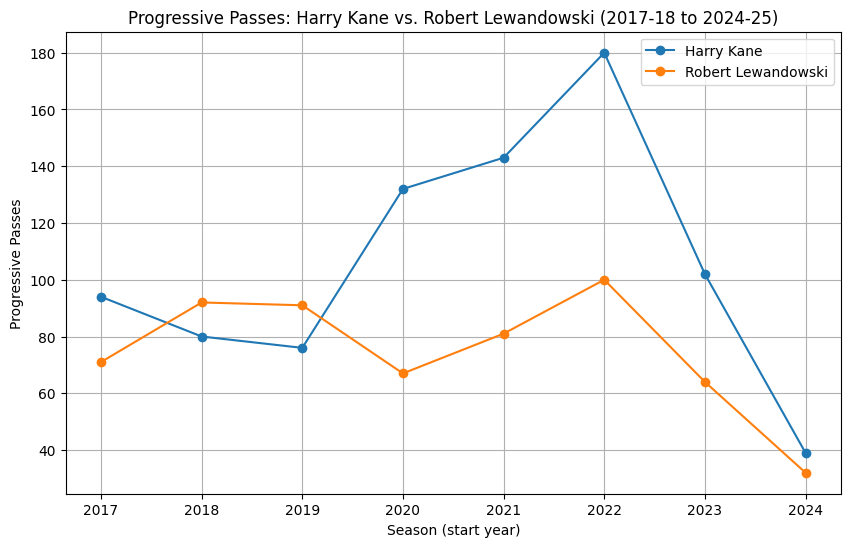

,player,season,league,prog_passes,season_start
0,Harry Kane,2017-2018,PL,94.0,2017
2,Harry Kane,2018-2019,PL,80.0,2018
4,Harry Kane,2019-2020,PL,76.0,2019
6,Harry Kane,2020-2021,PL,132.0,2020
8,Harry Kane,2021-2022,PL,143.0,2021
10,Harry Kane,2022-2023,PL,180.0,2022
12,Harry Kane,2023-2024,BL,102.0,2023
14,Harry Kane,2024-2025,BL,39.0,2024
1,Robert Lewandowski,2017-2018,BL,71.0,2017
3,Robert Lewandowski,2018-2019,BL,92.0,2018


In [2]:
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

######################
# 1) URL LOGIC
######################
def get_fbref_url(league, season):
    """
    Given a league code (PL/BL/LL) and a season string like "2017-2018",
    return the correct 'stats_standard' table URL for that league & season.

    For the 2024-2025 season, the format is:
        e.g. https://fbref.com/en/comps/20/stats/Bundesliga-Stats
    For older seasons, it follows:
        e.g. https://fbref.com/en/comps/20/2017-2018/stats/2017-2018-Bundesliga-Stats
    """
    league_id_map = {
        "PL": "9",   # Premier League
        "BL": "20",  # Bundesliga
        "LL": "12",  # La Liga
    }
    league_name_map = {
        "PL": "Premier-League",
        "BL": "Bundesliga",
        "LL": "La-Liga",
    }

    if season == "2024-2025":
        # New “stats” style, e.g. https://fbref.com/en/comps/20/stats/Bundesliga-Stats
        base_id = league_id_map[league]
        league_name = league_name_map[league]
        return f"https://fbref.com/en/comps/{base_id}/stats/{league_name}-Stats"
    else:
        # Older style, e.g. https://fbref.com/en/comps/20/2017-2018/stats/2017-2018-Bundesliga-Stats
        base_id = league_id_map[league]
        league_name = league_name_map[league]
        return (
            f"https://fbref.com/en/comps/{base_id}/{season}/stats/"
            f"{season}-{league_name}-Stats"
        )


def league_for_kane(season):
    """
    Returns the league code for Harry Kane in the given season:
      - 'PL' (Premier League) through 2022-2023,
      - 'BL' (Bundesliga) from 2023-2024 onward.
    """
    if season in [
        "2017-2018","2018-2019","2019-2020",
        "2020-2021","2021-2022","2022-2023"
    ]:
        return "PL"
    else:
        # 2023-2024, 2024-2025
        return "BL"


def league_for_lewandowski(season):
    """
    Returns the league code for Robert Lewandowski in the given season:
      - 'BL' (Bundesliga) through 2021-2022,
      - 'LL' (La Liga) from 2022-2023 onward.
    """
    if season in [
        "2017-2018","2018-2019","2019-2020",
        "2020-2021","2021-2022"
    ]:
        return "BL"
    else:
        # 2022-2023, 2023-2024, 2024-2025
        return "LL"


######################
# 2) SCRAPING & PARSING
######################
def scrape_stats_standard_tbody(url):
    """
    1) Fetch the FBref page,
    2) Find the comment block containing 'stats_standard',
    3) Parse it to find <table id="stats_standard">,
    4) Return the <tbody>.
    """
    res = requests.get(url)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml")

    # Find the comment block that has "stats_standard"
    comment_blocks = soup.find_all(string=lambda text: isinstance(text, Comment))
    stats_block = None
    for comment in comment_blocks:
        if "stats_standard" in comment:
            stats_block = comment
            break
    if not stats_block:
        raise ValueError(f"Could not find 'stats_standard' in comment blocks at {url}")

    # Parse that comment block as HTML
    comment_soup = BeautifulSoup(stats_block, "lxml")

    # Locate the table
    table = comment_soup.find("table", {"id": "stats_standard"})
    if not table:
        raise ValueError("Found comment with 'stats_standard', but no <table> inside.")

    # Grab the <tbody>
    tbody = table.find("tbody")
    if not tbody:
        raise ValueError("No <tbody> in stats_standard table")

    return tbody


def get_progressive_passes(tbody, player_name):
    """
    Within the <tbody>, find the row whose data-stat='player' text
    matches player_name, then return the float value of data-stat='progressive_passes'.
    """
    rows = tbody.find_all("tr")
    for row in rows:
        player_cell = row.find("td", {"data-stat": "player"})
        if not player_cell:
            continue
        name_in_row = player_cell.get_text(strip=True)
        if name_in_row.lower() == player_name.lower():
            # Found correct row
            passes_cell = row.find("td", {"data-stat": "progressive_passes"})
            if passes_cell:
                txt = passes_cell.get_text(strip=True)
                try:
                    return float(txt)
                except ValueError:
                    return None
    return None


######################
# 3) MAIN LOGIC + PLOT
######################
def compare_kane_lewandowski_progressive_passes():
    """
    For each season from 2017-2018 to 2024-2025:
      - Determine which league each player is in,
      - Scrape 'stats_standard' table from FBref,
      - Extract 'progressive_passes'.

    We'll store them in a DataFrame and plot a line chart
    with the actual season labels on the x-axis (not just the start year).
    """
    seasons = [
        "2017-2018","2018-2019","2019-2020","2020-2021",
        "2021-2022","2022-2023","2023-2024","2024-2025"
    ]

    data_records = []

    # Show a progress bar while scraping each season
    for season in tqdm(seasons, desc="Scraping seasons"):
        # Harry Kane
        k_league = league_for_kane(season)
        k_url = get_fbref_url(k_league, season)
        k_tbody = scrape_stats_standard_tbody(k_url)
        k_pp = get_progressive_passes(k_tbody, "Harry Kane")
        data_records.append({
            "player": "Harry Kane",
            "season": season,
            "league": k_league,
            "prog_passes": k_pp
        })

        # Robert Lewandowski
        l_league = league_for_lewandowski(season)
        l_url = get_fbref_url(l_league, season)
        l_tbody = scrape_stats_standard_tbody(l_url)
        l_pp = get_progressive_passes(l_tbody, "Robert Lewandowski")
        data_records.append({
            "player": "Robert Lewandowski",
            "season": season,
            "league": l_league,
            "prog_passes": l_pp
        })

    # Build a DataFrame
    df = pd.DataFrame(data_records)

    # Sort by (player, then season) for consistency
    # We'll also define a custom sort order for "season"
    df["season_sort"] = df["season"].str[:4].astype(int)  # e.g. "2017-2018" -> 2017
    df.sort_values(["player","season_sort"], inplace=True)

    # Prepare a unique, in-order list of seasons
    all_seasons = [
        "2017-2018","2018-2019","2019-2020","2020-2021",
        "2021-2022","2022-2023","2023-2024","2024-2025"
    ]
    x_positions = range(len(all_seasons))  # 0..7

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each player line using the same x positions
    # but reindex to ensure each player's data aligns to each season in order
    for player_name in ["Harry Kane", "Robert Lewandowski"]:
        subdf = df[df["player"] == player_name].copy()
        # Make the row index the "season", then reindex with all_seasons
        subdf = subdf.set_index("season").reindex(all_seasons)
        y_vals = subdf["prog_passes"].values  # might have NaNs if not found

        ax.plot(
            x_positions,
            y_vals,
            marker='o',
            label=player_name
        )

    # Now fix the x-axis to display the season strings
    ax.set_xticks(x_positions)
    ax.set_xticklabels(all_seasons, rotation=45)

    ax.set_title("Progressive Passes: Harry Kane vs. Robert Lewandowski (2017–18 to 2024–25)")
    ax.set_xlabel("Season")
    ax.set_ylabel("Progressive Passes")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

    return df


######################
# 4) RUN IT!
######################
#if __name__ == "__main__":
final_df = compare_kane_lewandowski_progressive_passes()
display(final_df)
